In [1]:
import pandas as pd
import os
from glob import glob
from tqdm import tqdm
import json
import numpy as np
import matplotlib.pyplot as plt
import torch
import cv2


# train.csv

In [2]:
train_csv = pd.read_csv('./data/train.csv')
train_csv

image   label
0     10027  3_b7_1
1     10037  3_00_0
2     10043  3_00_0
3     10045  3_00_0
4     10063  3_00_0
...     ...     ...
5762  67640  3_00_0
5763  67644  1_00_0
5764  67647  2_a5_2
5765  67649  1_00_0
5766  67678  5_b6_1

[5767 rows x 2 columns]

In [3]:
sample_submission = pd.read_csv('./data/sample_submission.csv')
sample_submission

image   label
0      10000  0_00_0
1      10001  0_00_0
2      10002  0_00_0
3      10003  0_00_0
4      10004  0_00_0
...      ...     ...
51901  67673  0_00_0
51902  67674  0_00_0
51903  67675  0_00_0
51904  67676  0_00_0
51905  67677  0_00_0

[51906 rows x 2 columns]

## Dataset 개수

In [4]:
test_set = glob('./data/test/*')
train_set = glob('./data/train/*')

print(f"test_set : {len(test_set)}")
print(f"train_set : {len(train_set)}")

test_set : 51906
train_set : 0


# 제공되는 label들

In [5]:
crop = {'1':'딸기',
        '2':'토마토',
        '3':'파프리카',
        '4':'오이',
        '5':'고추',
        '6':'시설포도'}

disease = {'1':{'a1':'딸기잿빛곰팡이병','a2':'딸기흰가루병','b1':'냉해피해','b6':'다량원소결핍 (N)','b7':'다량원소결핍 (P)','b8':'다량원소결핍 (K)'},
           '2':{'a5':'토마토흰가루병','a6':'토마토잿빛곰팡이병','b2':'열과','b3':'칼슘결핍','b6':'다량원소결핍 (N)','b7':'다량원소결핍 (P)','b8':'다량원소결핍 (K)'},
           '3':{'a9':'파프리카흰가루병','a10':'파프리카잘록병','b3':'칼슘결핍','b6':'다량원소결핍 (N)','b7':'다량원소결핍 (P)','b8':'다량원소결핍 (K)'},
           '4':{'a3':'오이노균병','a4':'오이흰가루병','b1':'냉해피해','b6':'다량원소결핍 (N)','b7':'다량원소결핍 (P)','b8':'다량원소결핍 (K)'},
           '5':{'a7':'고추탄저병','a8':'고추흰가루병','b3':'칼슘결핍','b6':'다량원소결핍 (N)','b7':'다량원소결핍 (P)','b8':'다량원소결핍 (K)'},
           '6':{'a11':'시설포도탄저병','a12':'시설포도노균병','b4':'일소피해','b5':'축과병'}}

risk = {'1':'초기','2':'중기','3':'말기'}

label_description = {}
for k, v in disease.items() :
    label_description[f'{k}_00_0'] = f'{crop[k]}_정상'
    for disease_code in v : 
        for risk_code in risk :
            label = f'{k}_{disease_code}_{risk_code}'
            label_description[label] = f'{crop[k]}_{disease[k][disease_code]}_{risk[risk_code]}'
print("총 개수 : ", len(list(label_description.items())))
print("Label : ",list(label_description.items()))

총 개수 :  111
Label :  [('1_00_0', '딸기_정상'), ('1_a1_1', '딸기_딸기잿빛곰팡이병_초기'), ('1_a1_2', '딸기_딸기잿빛곰팡이병_중기'), ('1_a1_3', '딸기_딸기잿빛곰팡이병_말기'), ('1_a2_1', '딸기_딸기흰가루병_초기'), ('1_a2_2', '딸기_딸기흰가루병_중기'), ('1_a2_3', '딸기_딸기흰가루병_말기'), ('1_b1_1', '딸기_냉해피해_초기'), ('1_b1_2', '딸기_냉해피해_중기'), ('1_b1_3', '딸기_냉해피해_말기'), ('1_b6_1', '딸기_다량원소결핍 (N)_초기'), ('1_b6_2', '딸기_다량원소결핍 (N)_중기'), ('1_b6_3', '딸기_다량원소결핍 (N)_말기'), ('1_b7_1', '딸기_다량원소결핍 (P)_초기'), ('1_b7_2', '딸기_다량원소결핍 (P)_중기'), ('1_b7_3', '딸기_다량원소결핍 (P)_말기'), ('1_b8_1', '딸기_다량원소결핍 (K)_초기'), ('1_b8_2', '딸기_다량원소결핍 (K)_중기'), ('1_b8_3', '딸기_다량원소결핍 (K)_말기'), ('2_00_0', '토마토_정상'), ('2_a5_1', '토마토_토마토흰가루병_초기'), ('2_a5_2', '토마토_토마토흰가루병_중기'), ('2_a5_3', '토마토_토마토흰가루병_말기'), ('2_a6_1', '토마토_토마토잿빛곰팡이병_초기'), ('2_a6_2', '토마토_토마토잿빛곰팡이병_중기'), ('2_a6_3', '토마토_토마토잿빛곰팡이병_말기'), ('2_b2_1', '토마토_열과_초기'), ('2_b2_2', '토마토_열과_중기'), ('2_b2_3', '토마토_열과_말기'), ('2_b3_1', '토마토_칼슘결핍_초기'), ('2_b3_2', '토마토_칼슘결핍_중기'), ('2_b3_3', '토마토_칼슘결핍_말기'), ('2_b6_1', '토마토_다량원소결핍 (N)_초기'), ('2_b6_2', '토마토_다량원소

# 실제 Training set에 포함된 label과 개수

In [6]:
train_csv = pd.read_csv('./data/train.csv')
display(train_csv['label'].unique())
display(len(train_csv['label'].unique()))

array(['3_b7_1', '3_00_0', '4_00_0', '3_a9_1', '1_00_0', '3_b3_1',
       '5_b8_1', '3_b8_1', '5_b6_1', '3_b6_1', '6_00_0', '2_a5_2',
       '3_a9_2', '2_00_0', '5_a7_2', '5_b7_1', '3_a9_3', '6_b4_1',
       '5_00_0', '6_b4_3', '6_a11_1', '6_a12_1', '6_a12_2', '6_b5_1',
       '6_a11_2'], dtype=object)

25

In [7]:
train_csv['label'].value_counts()

3_00_0     1177
4_00_0      917
6_00_0      828
1_00_0      810
2_a5_2      189
3_b3_1      166
5_b7_1      159
5_b8_1      157
3_b7_1      156
3_a9_1      154
3_b8_1      153
5_b6_1      148
2_00_0      143
3_b6_1      142
3_a9_2      111
5_a7_2       99
5_00_0       69
3_a9_3       42
6_a11_1      40
6_a12_2      29
6_b5_1       21
6_b4_1       18
6_b4_3       14
6_a12_1      13
6_a11_2      12
Name: label, dtype: int64

# Train Set 라벨별 이미지 출력

In [8]:
each_label_index = train_csv['label'].drop_duplicates().keys()
each_label_name = list(train_csv['label'].drop_duplicates())

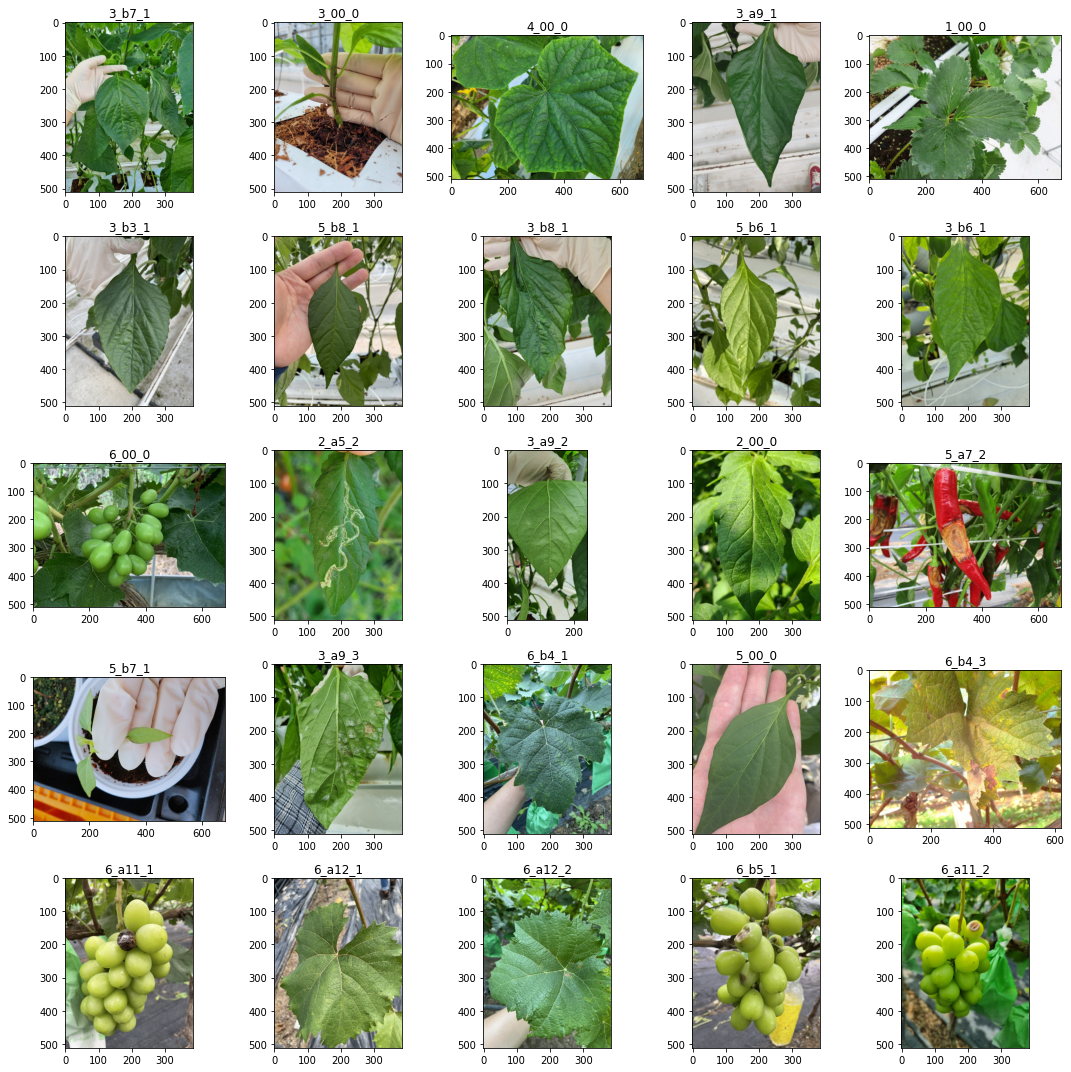

In [10]:
fig = plt.figure(figsize=(15, 15))
rows = 5
cols = 5
axes=[]

image_list = [train_csv['image'][i] for i in each_label_index]
for i, img_name in enumerate(image_list) :
    img = cv2.imread('./data/train/'+str(img_name)+'/'+str(img_name)+'.jpg')
    axes.append(fig.add_subplot(rows, cols, i+1))
    axes[-1].set_title(str(each_label_name[i]))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
fig.tight_layout() 
plt.show()

# CSV 파일 결측치 확인

## Training set

In [11]:
csv_lists = glob('./data/train/*/*.csv')

In [12]:
sample_csv = pd.read_csv(csv_lists[0])
csv_key = sample_csv.keys()
csv_key_total_num = {key : 0 for key in csv_key}
csv_key_exist_num = {key : 0 for key in csv_key}

In [13]:
for csv_path in tqdm(csv_lists) :
    csv_file = pd.read_csv(csv_path)
    csv_file = csv_file.replace('-', np.nan)
#     print(csv_path)
#     print(len(csv_file))
    for key in csv_key :
        csv_key_total_num[key] += len(csv_file)
        csv_key_exist_num[key] += csv_file[key].isnull().sum()
        
#         print(key)
#         print(csv_file[key].isnull().sum())

100%|██████████████████████████████████████████████████████████████████████████████| 5767/5767 [01:19<00:00, 72.41it/s]


In [14]:
display(csv_key_total_num)
display(csv_key_exist_num)

{'측정시각': 1778127,
 '내부 온도 1 평균': 1778127,
 '내부 온도 1 최고': 1778127,
 '내부 온도 1 최저': 1778127,
 '내부 온도 2 평균': 1778127,
 '내부 온도 2 최고': 1778127,
 '내부 온도 2 최저': 1778127,
 '내부 온도 3 평균': 1778127,
 '내부 온도 3 최고': 1778127,
 '내부 온도 3 최저': 1778127,
 '내부 온도 4 평균': 1778127,
 '내부 온도 4 최고': 1778127,
 '내부 온도 4 최저': 1778127,
 '내부 습도 1 평균': 1778127,
 '내부 습도 1 최고': 1778127,
 '내부 습도 1 최저': 1778127,
 '내부 습도 2 평균': 1778127,
 '내부 습도 2 최고': 1778127,
 '내부 습도 2 최저': 1778127,
 '내부 습도 3 평균': 1778127,
 '내부 습도 3 최고': 1778127,
 '내부 습도 3 최저': 1778127,
 '내부 습도 4 평균': 1778127,
 '내부 습도 4 최고': 1778127,
 '내부 습도 4 최저': 1778127,
 '내부 이슬점 평균': 1778127,
 '내부 이슬점 최고': 1778127,
 '내부 이슬점 최저': 1778127,
 '내부 CO2 평균': 1778127,
 '내부 CO2 최고': 1778127,
 '내부 CO2 최저': 1778127,
 '외부 풍속 평균': 1778127,
 '외부 풍속 최고': 1778127,
 '외부 풍속 최저': 1778127,
 '내부 EC 1 평균': 1778127,
 '내부 EC 1 최고': 1778127,
 '내부 EC 1 최저': 1778127,
 '내부 PH 1 평균': 1778127,
 '내부 PH 1 최고': 1778127,
 '내부 PH 1 최저': 1778127,
 '배지 중량 평균': 1778127,
 '배지 중량 최고': 1778127,
 '배지 중량 최저': 1

{'측정시각': 0,
 '내부 온도 1 평균': 0,
 '내부 온도 1 최고': 0,
 '내부 온도 1 최저': 0,
 '내부 온도 2 평균': 1769895,
 '내부 온도 2 최고': 1769895,
 '내부 온도 2 최저': 1769895,
 '내부 온도 3 평균': 1769895,
 '내부 온도 3 최고': 1769895,
 '내부 온도 3 최저': 1769895,
 '내부 온도 4 평균': 1778127,
 '내부 온도 4 최고': 1778127,
 '내부 온도 4 최저': 1778127,
 '내부 습도 1 평균': 0,
 '내부 습도 1 최고': 0,
 '내부 습도 1 최저': 0,
 '내부 습도 2 평균': 1769895,
 '내부 습도 2 최고': 1769895,
 '내부 습도 2 최저': 1769895,
 '내부 습도 3 평균': 1769895,
 '내부 습도 3 최고': 1769895,
 '내부 습도 3 최저': 1769895,
 '내부 습도 4 평균': 1778127,
 '내부 습도 4 최고': 1778127,
 '내부 습도 4 최저': 1778127,
 '내부 이슬점 평균': 70,
 '내부 이슬점 최고': 70,
 '내부 이슬점 최저': 70,
 '내부 CO2 평균': 720012,
 '내부 CO2 최고': 720012,
 '내부 CO2 최저': 720012,
 '외부 풍속 평균': 1778127,
 '외부 풍속 최고': 1778127,
 '외부 풍속 최저': 1778127,
 '내부 EC 1 평균': 1778127,
 '내부 EC 1 최고': 1778127,
 '내부 EC 1 최저': 1778127,
 '내부 PH 1 평균': 1778127,
 '내부 PH 1 최고': 1778127,
 '내부 PH 1 최저': 1778127,
 '배지 중량 평균': 1778127,
 '배지 중량 최고': 1778127,
 '배지 중량 최저': 1778127,
 '양액 온도 평균': 1778127,
 '양액 온도 최고': 1778127,
 '양액 온도 

In [15]:
none_data = {key : csv_key_exist_num[key]/csv_key_total_num[key]for key in csv_key}
none_data

{'측정시각': 0.0,
 '내부 온도 1 평균': 0.0,
 '내부 온도 1 최고': 0.0,
 '내부 온도 1 최저': 0.0,
 '내부 온도 2 평균': 0.9953704094251985,
 '내부 온도 2 최고': 0.9953704094251985,
 '내부 온도 2 최저': 0.9953704094251985,
 '내부 온도 3 평균': 0.9953704094251985,
 '내부 온도 3 최고': 0.9953704094251985,
 '내부 온도 3 최저': 0.9953704094251985,
 '내부 온도 4 평균': 1.0,
 '내부 온도 4 최고': 1.0,
 '내부 온도 4 최저': 1.0,
 '내부 습도 1 평균': 0.0,
 '내부 습도 1 최고': 0.0,
 '내부 습도 1 최저': 0.0,
 '내부 습도 2 평균': 0.9953704094251985,
 '내부 습도 2 최고': 0.9953704094251985,
 '내부 습도 2 최저': 0.9953704094251985,
 '내부 습도 3 평균': 0.9953704094251985,
 '내부 습도 3 최고': 0.9953704094251985,
 '내부 습도 3 최저': 0.9953704094251985,
 '내부 습도 4 평균': 1.0,
 '내부 습도 4 최고': 1.0,
 '내부 습도 4 최저': 1.0,
 '내부 이슬점 평균': 3.9367266792529445e-05,
 '내부 이슬점 최고': 3.9367266792529445e-05,
 '내부 이슬점 최저': 3.9367266792529445e-05,
 '내부 CO2 평균': 0.404927207111753,
 '내부 CO2 최고': 0.404927207111753,
 '내부 CO2 최저': 0.404927207111753,
 '외부 풍속 평균': 1.0,
 '외부 풍속 최고': 1.0,
 '외부 풍속 최저': 1.0,
 '내부 EC 1 평균': 1.0,
 '내부 EC 1 최고': 1.0,
 '내부 EC 1 최저': 1.0,

## Test Set

In [16]:
csv_lists = glob('./data/test/*/*.csv')

sample_csv = pd.read_csv(csv_lists[0])
csv_key = sample_csv.keys()
csv_key_total_num = {key : 0 for key in csv_key}
csv_key_exist_num = {key : 0 for key in csv_key}

for csv_path in tqdm(csv_lists) :
    csv_file = pd.read_csv(csv_path)
    csv_file = csv_file.replace('-', np.nan)
#     print(csv_path)
#     print(len(csv_file))
    for key in csv_key :
        csv_key_total_num[key] += len(csv_file)
        csv_key_exist_num[key] += csv_file[key].isnull().sum()
        
#         print(key)
#         print(csv_file[key].isnull().sum())

100%|████████████████████████████████████████████████████████████████████████████| 51906/51906 [11:56<00:00, 72.42it/s]


In [17]:
none_data = {key : csv_key_exist_num[key]/csv_key_total_num[key]for key in csv_key}
none_data

{'측정시각': 0.0,
 '내부 온도 1 평균': 0.0,
 '내부 온도 1 최고': 0.0,
 '내부 온도 1 최저': 0.0,
 '내부 온도 2 평균': 0.9953073634833385,
 '내부 온도 2 최고': 0.9953073634833385,
 '내부 온도 2 최저': 0.9953073634833385,
 '내부 온도 3 평균': 0.9953073634833385,
 '내부 온도 3 최고': 0.9953073634833385,
 '내부 온도 3 최저': 0.9953073634833385,
 '내부 온도 4 평균': 1.0,
 '내부 온도 4 최고': 1.0,
 '내부 온도 4 최저': 1.0,
 '내부 습도 1 평균': 0.0,
 '내부 습도 1 최고': 0.0,
 '내부 습도 1 최저': 0.0,
 '내부 습도 2 평균': 0.9953073634833385,
 '내부 습도 2 최고': 0.9953073634833385,
 '내부 습도 2 최저': 0.9953073634833385,
 '내부 습도 3 평균': 0.9953073634833385,
 '내부 습도 3 최고': 0.9953073634833385,
 '내부 습도 3 최저': 0.9953073634833385,
 '내부 습도 4 평균': 1.0,
 '내부 습도 4 최고': 1.0,
 '내부 습도 4 최저': 1.0,
 '내부 이슬점 평균': 6.827126799633741e-05,
 '내부 이슬점 최고': 6.827126799633741e-05,
 '내부 이슬점 최저': 6.827126799633741e-05,
 '내부 CO2 평균': 0.40985019101614956,
 '내부 CO2 최고': 0.40985019101614956,
 '내부 CO2 최저': 0.40985019101614956,
 '외부 풍속 평균': 1.0,
 '외부 풍속 최고': 1.0,
 '외부 풍속 최저': 1.0,
 '내부 EC 1 평균': 1.0,
 '내부 EC 1 최고': 1.0,
 '내부 EC 1 최저': 1

In [23]:
test_img_list = glob('./data/test/*/*.jpg')

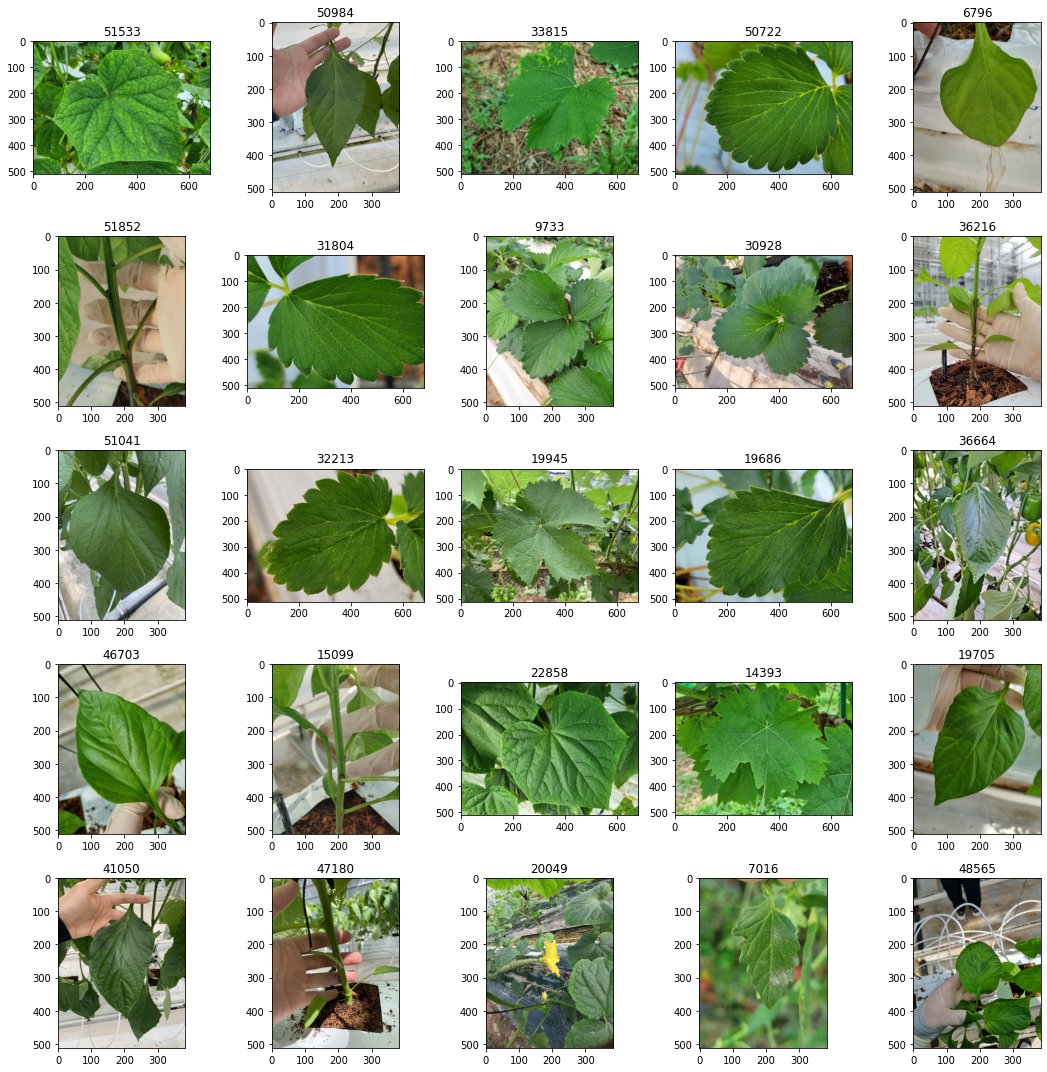

In [27]:
rand_pick = np.random.randint(0, len(test_img_list), size=25)
fig = plt.figure(figsize=(15,15))
rows = 5
cols = 5
axes = []
for idx, rand_num in enumerate(rand_pick) :

    img = cv2.imread(test_img_list[rand_num])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axes.append(fig.add_subplot(rows, cols ,idx + 1))
    axes[-1].set_title(str(rand_num))
    plt.imshow(img)
    
fig.tight_layout()
plt.show()

# Training Set에 있는 CSV 파일 길이 확인

In [50]:
train_csv = glob('./data/train/*/*.csv')

csv_len_check = {}
for csv_path in tqdm(train_csv) :
    csv_file = pd.read_csv(csv_path)
    
    if len(csv_file) in csv_len_check :
        csv_len_check[len(csv_file)] += 1
    elif len(csv_file) not in csv_len_check :
        csv_len_check[len(csv_file)] = 1
        
csv_len = {sorted_key : csv_len_check[sorted_key] for sorted_key in sorted(csv_len_check)}
csv_len

100%|█████████████████████████████████████████████████████████████████████████████| 5767/5767 [00:16<00:00, 356.72it/s]


{1: 5,
 43: 1,
 45: 1,
 46: 1,
 74: 150,
 75: 2,
 77: 156,
 108: 10,
 109: 6,
 110: 7,
 111: 2,
 112: 12,
 113: 6,
 114: 6,
 115: 6,
 116: 2,
 117: 2,
 122: 3,
 123: 1,
 124: 2,
 125: 1,
 126: 4,
 127: 2,
 128: 1,
 136: 25,
 137: 31,
 138: 31,
 139: 14,
 140: 12,
 141: 12,
 142: 22,
 143: 14,
 144: 4,
 150: 2,
 151: 3,
 152: 25,
 153: 3,
 154: 14,
 155: 4,
 156: 7,
 157: 5,
 158: 7,
 159: 9,
 160: 8,
 161: 4,
 186: 1,
 187: 2,
 198: 4,
 199: 1,
 206: 22,
 215: 1,
 233: 83,
 240: 41,
 241: 11,
 245: 47,
 262: 27,
 263: 5,
 264: 2,
 273: 5,
 274: 2,
 275: 6,
 277: 3,
 278: 6,
 279: 4,
 280: 3,
 281: 4,
 282: 5,
 283: 8,
 284: 2,
 285: 13,
 286: 9,
 287: 10,
 291: 404,
 293: 36,
 294: 3562,
 295: 29,
 454: 19,
 456: 1,
 574: 156,
 577: 3,
 586: 4,
 588: 580,
 590: 1}

C:\Users\quhb2\AppData\Local\Temp\ipykernel_17368\297434187.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(x, rotation=90)


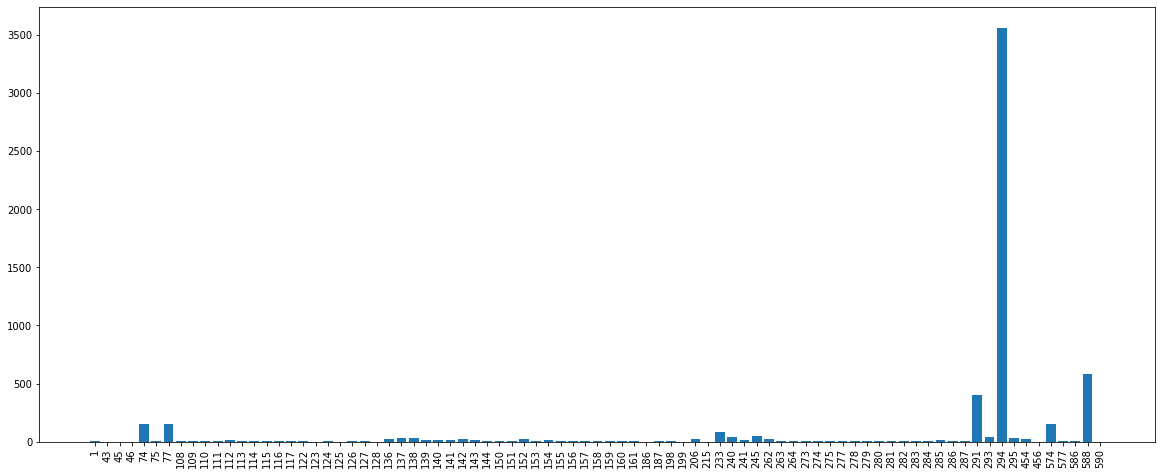

In [57]:
f, axs = plt.subplots(1,1, figsize=(20,8))
csv_len_list = list(csv_len.items())
x, y = zip(*csv_len_list)
x = list(map(str, x))
axs.bar(x,y)
axs.set_xticklabels(x, rotation=90)
plt.show()

# Public Dataset 

In [58]:
PlantVillage_label = {'Apple___Apple_scab': 630,
 'Apple___Black_rot': 621,
 'Apple___Cedar_apple_rust': 275,
 'Apple___healthy': 1645,
 'Blueberry___healthy': 1502,
 'Cherry_(including_sour)___healthy': 854,
 'Cherry_(including_sour)___Powdery_mildew': 1052,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 513,
 'Corn_(maize)___Common_rust_': 1192,
 'Corn_(maize)___healthy': 1162,
 'Corn_(maize)___Northern_Leaf_Blight': 985,
 'Grape___Black_rot': 1180,
 'Grape___Esca_(Black_Measles)': 1383,
 'Grape___healthy': 423,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076,
 'Orange___Haunglongbing_(Citrus_greening)': 5507,
 'Peach___Bacterial_spot': 2297,
 'Peach___healthy': 360,
 'Pepper,_bell___Bacterial_spot': 997,
 'Pepper,_bell___healthy': 1477,
 'Potato___Early_blight': 1000,
 'Potato___healthy': 152,
 'Potato___Late_blight': 1000,
 'Raspberry___healthy': 371,
 'Soybean___healthy': 5090,
 'Squash___Powdery_mildew': 1835,
 'Strawberry___healthy': 456,
 'Strawberry___Leaf_scorch': 1109,
 'Tomato___Bacterial_spot': 2127,
 'Tomato___Early_blight': 1000,
 'Tomato___healthy': 1591,
 'Tomato___Late_blight': 1909,
 'Tomato___Leaf_Mold': 952,
 'Tomato___Septoria_leaf_spot': 1771,
 'Tomato___Spider_mites Two-spotted_spider_mite': 1676,
 'Tomato___Target_Spot': 1404,
 'Tomato___Tomato_mosaic_virus': 373,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 5357}


sum(PlantVillage_label.values())
    

54304

## public set Image data

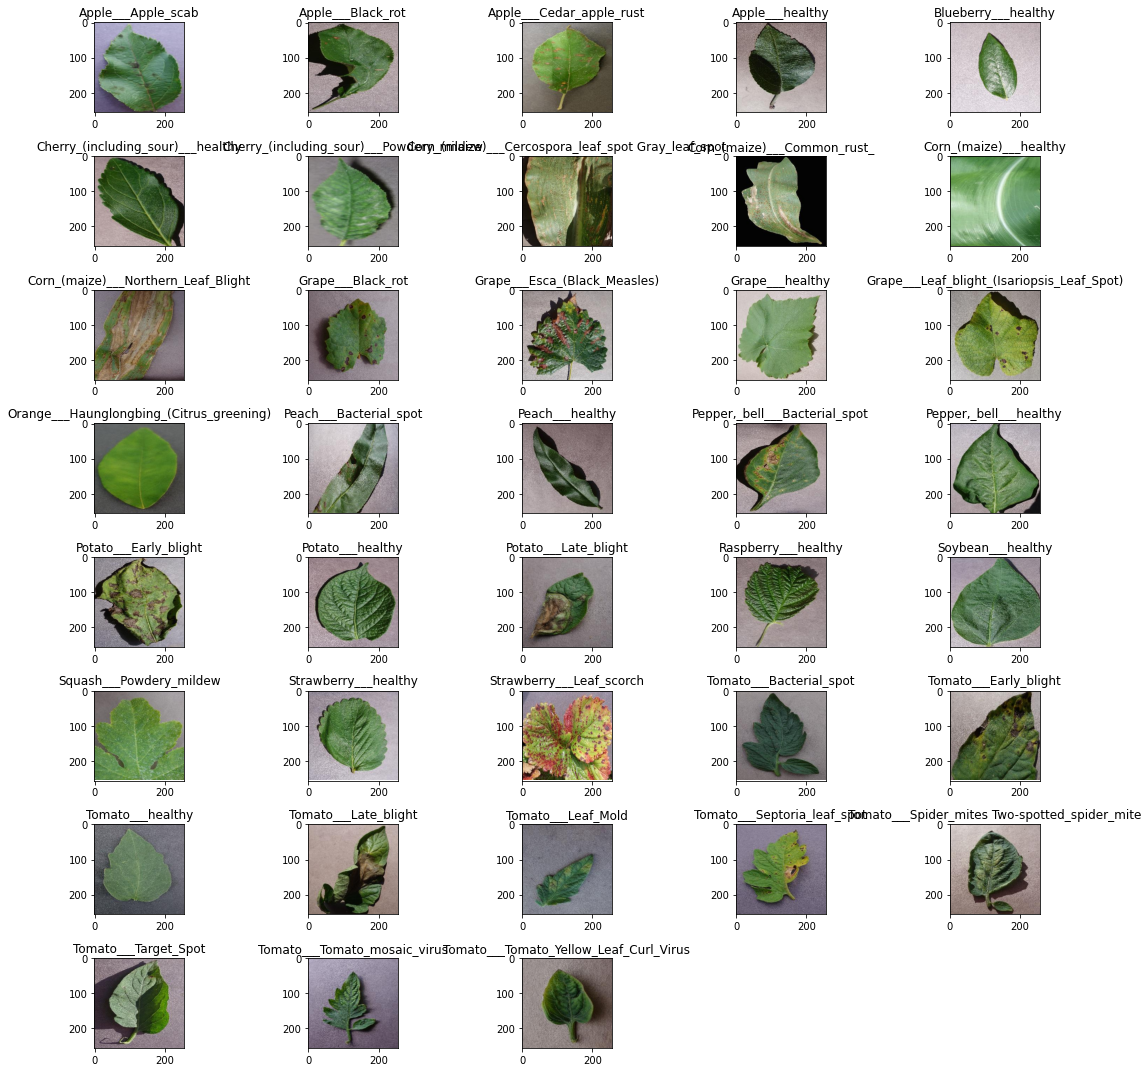

In [68]:
fig = plt.figure(figsize=(15,15))
rows = 8
cols = 5
axes = []

label_path = glob('./data/public/*')
label_list = [path.split('\\')[-1] for path in label_path]

for idx, label in enumerate(label_path) :
    img_path = glob(f'{label}/*.jpg')[0]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes.append(fig.add_subplot(rows, cols ,idx + 1))
    axes[-1].set_title(str(label_list[idx]))
    plt.imshow(img)
    
fig.tight_layout()
plt.show()
    


## Json 파일에 있는 key값을 기준으로 Dataframe 만들기

In [3]:
json_list = glob('./data/train/*/*.json')

for i, json_file in enumerate(tqdm(json_list)) : 
    tmp_json = json.load(open(json_file, 'r'))
    tmp_dict = {
        '데이터종류' : tmp_json['description']['task'], # 데이터 종류 (질병/해충/병해/정상 구분)
        '촬영지역' : tmp_json['description']['region'], # 촬영 지역
        '가로' : tmp_json['description']['width'], # 가로
        '세로' : tmp_json['description']['height'], # 세로
        '촬영부위' : tmp_json['annotations']['area'], # 작물 촬영 부위
        '상태코드' : tmp_json['annotations']['disease'], # 작물 상태 코드
        '생육단계' : tmp_json['annotations']['grow'], # 작물의 생육 단계 
        '질병피해정도' : tmp_json['annotations']['risk'], # 질병 피해 정도
        '작물코드' : tmp_json['annotations']['crop'] # 작물 코드
    }
    if i == 0:
        _df_json = pd.json_normalize(tmp_dict)
    else :
        _df_json = _df_json.append(pd.json_normalize(tmp_dict))
_df_json

100%|██████████████████████████████████████████████████████████████████████████████| 5767/5767 [00:16<00:00, 355.20it/s]


데이터종류  촬영지역   가로   세로  촬영부위 상태코드  생육단계  질병피해정도  작물코드
0       2     0  384  512     3   b7    13       1     3
0       0     0  384  512     5   00    11       0     3
0       0     0  384  512     1   00    13       0     3
0       0     0  384  512     3   00    11       0     3
0       0     0  384  512     1   00    13       0     3
..    ...   ...  ...  ...   ...  ...   ...     ...   ...
0       0     0  384  512     5   00    11       0     3
0       0     0  682  512     3   00    11       0     1
0       1     0  682  512     3   a5    12       2     2
0       0     0  384  512     3   00    12       0     1
0       2     0  384  512     3   b6    13       1     5

[5767 rows x 9 columns]

In [8]:
df_json = _df_json.reset_index(drop=True)
df_json

데이터종류  촬영지역   가로   세로  촬영부위 상태코드  생육단계  질병피해정도  작물코드
0         2     0  384  512     3   b7    13       1     3
1         0     0  384  512     5   00    11       0     3
2         0     0  384  512     1   00    13       0     3
3         0     0  384  512     3   00    11       0     3
4         0     0  384  512     1   00    13       0     3
...     ...   ...  ...  ...   ...  ...   ...     ...   ...
5762      0     0  384  512     5   00    11       0     3
5763      0     0  682  512     3   00    11       0     1
5764      1     0  682  512     3   a5    12       2     2
5765      0     0  384  512     3   00    12       0     1
5766      2     0  384  512     3   b6    13       1     5

[5767 rows x 9 columns]

## json 값 별로 네이밍

In [9]:
crop = {1:'딸기',
        2:'토마토',
        3:'파프리카',
        4:'오이',
        5:'고추',
        6:'시설포도'}

disease = {
    '00' : '정상',
    'a1':'딸기잿빛곰팡이병',
    'a2':'딸기흰가루병',
    'b1':'냉해피해',
    'b6':'다량원소결핍 (N)',
    'b7':'다량원소결핍 (P)',
    'b8':'다량원소결핍 (K)',
    'a5':'토마토흰가루병',
    'a6':'토마토잿빛곰팡이병',
    'b2':'열과','b3':'칼슘결핍',
    'b6':'다량원소결핍 (N)',
    'b7':'다량원소결핍 (P)',
    'b8':'다량원소결핍 (K)',
    'a9':'파프리카흰가루병',
    'a10':'파프리카잘록병',
    'b3':'칼슘결핍',
    'b6':'다량원소결핍 (N)',
    'b7':'다량원소결핍 (P)',
    'b8':'다량원소결핍 (K)',
    'a3':'오이노균병',
    'a4':'오이흰가루병',
    'b1':'냉해피해',
    'b6':'다량원소결핍 (N)',
    'b7':'다량원소결핍 (P)',
    'b8':'다량원소결핍 (K)',
    'a7':'고추탄저병',
    'a8':'고추흰가루병',
    'b3':'칼슘결핍'
    ,'b6':'다량원소결핍 (N)',
    'b7':'다량원소결핍 (P)',
    'b8':'다량원소결핍 (K)',
    'a11':'시설포도탄저병',
    'a12':'시설포도노균병',
    'b4':'일소피해',
    'b5':'축과병'
}

risk = {
    0 : '정상',
    1 : '초기',
    2 : '중기',
    3 : '말기'
}

task = {
    0 : '정상',
    1 : '병해',
    2 : '생리장애'
}

area = {
    1 : '열매',
    2 : '꽃',
    3 : '잎',
    4 : '가지',
    5 : '줄기',
    6 : '뿌리',
    7 : '해충'
}

grow = {
    11: '유모기',
    12: '생장기',
    13: '착화/과실기',
    21: '발아기',
    22: '개화기',
    23: '신초생장기',
    24: '과실성숙기',
    25: '수확기',
    26: '휴먼기'
}

## 총 class 개수

In [10]:
df_json['label_code'] = df_json['작물코드'].astype(str)+'_'+df_json['상태코드'].astype(str)+'_'+df_json['질병피해정도'].astype(str)
print(df_json['label_code'].unique())
print("총 class 개수 : ",len(df_json['label_code'].unique()))

['3_b7_1' '3_00_0' '4_00_0' '3_a9_1' '1_00_0' '3_b3_1' '5_b8_1' '3_b8_1'
 '5_b6_1' '3_b6_1' '6_00_0' '2_a5_2' '3_a9_2' '2_00_0' '5_a7_2' '5_b7_1'
 '3_a9_3' '6_b4_1' '5_00_0' '6_b4_3' '6_a11_1' '6_a12_1' '6_a12_2'
 '6_b5_1' '6_a11_2']
총 class 개수 :  25


## 네이밍을 json 값에 mapping

In [11]:
df_json['작물코드'] = df_json['작물코드'].map(crop) + '(' + df_json['작물코드'].astype(str) +')'
df_json['상태코드'] = df_json['상태코드'].map(disease) + '(' + df_json['상태코드'].astype(str) +')'
df_json['질병피해정도'] = df_json['질병피해정도'].map(risk) + '(' + df_json['질병피해정도'].astype(str) +')'
df_json['촬영부위'] = df_json['촬영부위'].map(area) + '(' + df_json['촬영부위'].astype(str) +')'
df_json['생육단계'] = df_json['생육단계'].map(grow) + '(' + df_json['생육단계'].astype(str) +')'
df_json['데이터종류'] = df_json['데이터종류'].map(task) + '(' + df_json['데이터종류'].astype(str) +')'
df_json['label_code'] = df_json['작물코드'].astype(str)+'_'+df_json['상태코드'].astype(str)+'_'+df_json['질병피해정도'].astype(str)

In [12]:
df_json

데이터종류  촬영지역   가로   세로   촬영부위            상태코드        생육단계 질병피해정도  \
0     생리장애(2)     0  384  512   잎(3)  다량원소결핍 (P)(b7)  착화/과실기(13)  초기(1)   
1       정상(0)     0  384  512  줄기(5)          정상(00)     유모기(11)  정상(0)   
2       정상(0)     0  384  512  열매(1)          정상(00)  착화/과실기(13)  정상(0)   
3       정상(0)     0  384  512   잎(3)          정상(00)     유모기(11)  정상(0)   
4       정상(0)     0  384  512  열매(1)          정상(00)  착화/과실기(13)  정상(0)   
...       ...   ...  ...  ...    ...             ...         ...    ...   
5762    정상(0)     0  384  512  줄기(5)          정상(00)     유모기(11)  정상(0)   
5763    정상(0)     0  682  512   잎(3)          정상(00)     유모기(11)  정상(0)   
5764    병해(1)     0  682  512   잎(3)     토마토흰가루병(a5)     생장기(12)  중기(2)   
5765    정상(0)     0  384  512   잎(3)          정상(00)     생장기(12)  정상(0)   
5766  생리장애(2)     0  384  512   잎(3)  다량원소결핍 (N)(b6)  착화/과실기(13)  초기(1)   

         작물코드                    label_code  
0     파프리카(3)  파프리카(3)_다량원소결핍 (P)(b7)_초기(1)  
1     파프리카(3)          파프리카(3)_정상(00)_정상(0)  
2     파프리카(3)          파프리카(3)_정상(00)_정상(0)  
3     파프리카(3)          파프리카(3)_정상(00)_정상(0)  
4     파프리카(3)          파프리카(3)_정상(00)_정상(0)  
...       ...                           ...  
5762  파프리카(3)          파프리카(3)_정상(00)_정상(0)  
5763    딸기(1)            딸기(1)_정상(00)_정상(0)  
5764   토마토(2)      토마토(2)_토마토흰가루병(a5)_중기(2)  
5765    딸기(1)            딸기(1)_정상(00)_정상(0)  
5766    고추(5)    고추(5)_다량원소결핍 (N)(b6)_초기(1)  

[5767 rows x 10 columns]

## 폰트 설정

In [25]:
import platform
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings("ignore")

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

## key 값 별 분포확인
- 데이터 종류
- 촬영부위
- 상태코드
- 생육단계
- 질병피해정도
- 작물코드

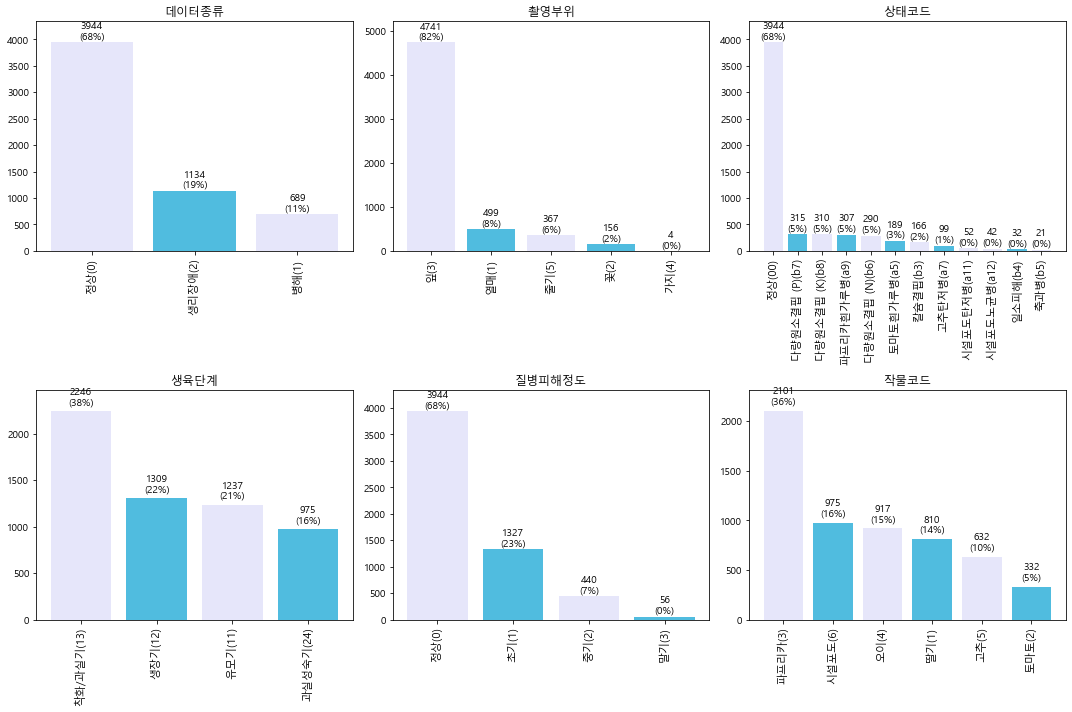

In [27]:
f, axs = plt.subplots(2,3,figsize=(15,10))
axs = axs.flatten()

for i, col in enumerate(['데이터종류','촬영부위','상태코드','생육단계','질병피해정도','작물코드']) :
    object_cnt = df_json[col].value_counts().sort_values(ascending=False)
    axs[i].bar(object_cnt.index, object_cnt.values, color=['#e6e6fa' if a%2==0 else '#50bcdf' for a in range(9)])
    
    for x, y, z in zip(object_cnt.index, object_cnt.values, object_cnt.values/object_cnt.sum()*100) :
        axs[i].annotate('%d\n(%d%%)' %(int(y), z), xy=(x, y+70), textcoords='data', ha='center')
    axs[i].axis(ymin=0, ymax=int(max(object_cnt)*1.1))
    axs[i].set_xticklabels(object_cnt.index, rotation = 90,fontsize = 11)
    axs[i].set_title(col)
f.tight_layout()
plt.show()

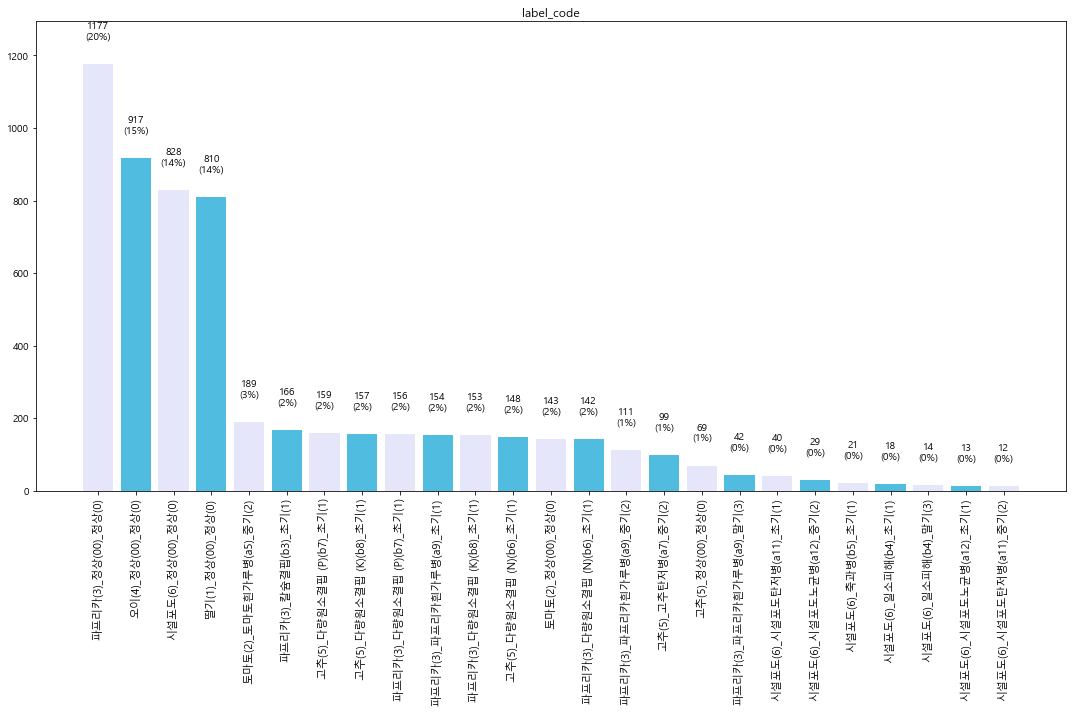

In [31]:
f, axs = plt.subplots(1,1 ,figsize=(15,10))
for i, col in enumerate(['label_code']) :
    object_cnt = df_json[col].value_counts().sort_values(ascending=False)
    axs.bar(object_cnt.index, object_cnt.values, color=['#e6e6fa' if a%2==0 else '#50bcdf' for a in range(25)])
    
    for x, y, z in zip(object_cnt.index, object_cnt.values, object_cnt.values/object_cnt.sum()*100) :
        axs.annotate('%d\n(%d%%)' %(int(y), z), xy=(x, y+70), textcoords='data', ha='center')
    axs.axis(ymin=0, ymax=int(max(object_cnt)*1.1))
    axs.set_xticklabels(object_cnt.index, rotation = 90,fontsize = 11)
    axs.set_title(col)
f.tight_layout()dd
plt.show()